In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read the CSV file into a pandas DataFrame
df_raw = pd.read_csv('gpt_SentAnalysis_spa_to_eng.csv')

In [28]:
df_raw.head(1)

,Original,gpt4,eng_sadness,eng_joy,eng_love,eng_anger,eng_fear,eng_surprise,spa_sadness,spa_joy,spa_love,spa_anger,spa_fear,spa_surprise
0,"¿Cómo estás, soy turbulent? Y yo la burrita bu...","How are you, am I turbulent? And I the little ...",0.004452,0.001799,0.0004,0.992304,0.00088,0.000165,0.015954,0.027759,0.002183,0.938403,0.014955,0.000747


## Note: the sentiments within each language are relative: in each sample the values add up to 1.0 for Spanish and for English.

In [4]:
ordered_columns = ['eng_sadness', 'spa_sadness', 
                   'eng_joy', 'spa_joy', 
                   'eng_love', 'spa_love', 
                   'eng_anger', 'spa_anger', 
                   'eng_fear', 'spa_fear', 
                   'eng_surprise', 'spa_surprise']

# Create a new DataFrame with the columns reordered
df = df_raw[ordered_columns]
df.head()

,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise
0,0.004452,0.015954,0.001799,0.027759,0.000400,0.002183,0.992304,0.938403,0.000880,0.014955,0.000165,0.000747
1,0.000344,0.007161,0.998451,0.954246,0.000293,0.003007,0.000311,0.027997,0.000280,0.006280,0.000321,0.001310
2,0.025169,0.019489,0.925640,0.543833,0.002035,0.009557,0.042370,0.395938,0.003410,0.027925,0.001376,0.003257
3,0.020715,0.016694,0.400296,0.508439,0.002824,0.005596,0.559954,0.436137,0.014306,0.030408,0.001905,0.002725
4,0.000295,0.011552,0.997686,0.802784,0.000753,0.008076,0.000564,0.159256,0.000207,0.015909,0.000497,0.002423


In [5]:
# Find the index of the maximum sentiment score for each row for English sentiments
df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)

# Find the index of the maximum sentiment score for each row for Spanish sentiments
df['spa_highest_sent'] = df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']].idxmax(axis=1)

C:\Users\blw3912\AppData\Local\Temp\ipykernel_24668\1552039461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['eng_highest_sent'] = df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']].idxmax(axis=1)


In [6]:
# Remove the prefix "eng_" from each entry in the 'eng_highest_sent' column
df['eng_highest_sent'] = df['eng_highest_sent'].str.replace('eng_', '')

# Remove the prefix "spa_" from each entry in the 'spa_highest_sent' column
df['spa_highest_sent'] = df['spa_highest_sent'].str.replace('spa_', '')

# Calculate the number of matching values
matching_count = (df['eng_highest_sent'] == df['spa_highest_sent']).sum()

top_emotion_accuracy = matching_count/df.shape[0]*100
print(np.round(top_emotion_accuracy),"% of the phrases have the same top-ranked emotion in each language.")

45.0 % of the phrases have the same top-ranked emotion in each language.


## It's surprising that the idioms do worse than DeepTranslator on top-ranked emotions.  Could it be due to the samples being too short to accurately capture emotion?

In [7]:
# I don't think I ended up using this, 
# I was just playing around to see if we had ok sentiment matches in general, since there were ZERO matches on top sentiment

df['eng_positive'] = df['eng_joy'] + df['eng_love']
df['spa_positive'] = df['spa_joy'] + df['spa_love']

df['eng_negative'] = df['eng_sadness'] + df['eng_anger'] + df['eng_fear']
df['spa_negative'] = df['spa_sadness'] + df['spa_anger'] + df['spa_fear']

df['eng_neutral'] = df['eng_surprise']
df['spa_neutral'] = df['spa_surprise']

In [8]:
# Summary statistics for rows
#row_summary = df.describe()

# Summary statistics for columns
col_summary = df[2:].describe()

# Overall summary statistics
overall_summary = df.describe().describe()

# Output the summary statistics
#print("Summary statistics for rows:")
#print(row_summary)
#print("\nSummary statistics for columns:")
#print(col_summary)
print("Column summary statistics\nfor idioms")
col_summary

Column summary statistics
for idioms


,eng_sadness,spa_sadness,eng_joy,spa_joy,eng_love,spa_love,eng_anger,spa_anger,eng_fear,spa_fear,eng_surprise,spa_surprise,eng_positive,spa_positive,eng_negative,spa_negative,eng_neutral,spa_neutral
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000
mean,0.144591,0.036016,0.430944,0.581830,0.032680,0.012835,0.235866,0.325264,0.138308,0.040594,0.017611,0.003461,0.463624,0.594665,0.518765,0.401874,0.017611,0.003461
std,0.303812,0.093307,0.436316,0.240448,0.152638,0.035357,0.338702,0.207396,0.288104,0.045824,0.107792,0.001540,0.441780,0.238941,0.440977,0.238353,0.107792,0.001540
min,0.000148,0.000549,0.000185,0.000410,0.000113,0.000183,0.000092,0.000179,0.000093,0.000109,0.000093,0.000117,0.000332,0.000593,0.000346,0.000837,0.000093,0.000117
25%,0.001487,0.017429,0.006680,0.419056,0.000522,0.006708,0.001787,0.164355,0.000817,0.021877,0.000415,0.002706,0.009516,0.431180,0.014353,0.220306,0.000415,0.002706
50%,0.008067,0.023973,0.204697,0.605013,0.001285,0.010135,0.030889,0.299086,0.005603,0.033461,0.001009,0.003394,0.320824,0.620644,0.594810,0.375646,0.001009,0.003394
75%,0.053046,0.030380,0.961484,0.765626,0.003236,0.014302,0.401960,0.467502,0.066462,0.048573,0.002326,0.004210,0.980861,0.777271,0.985783,0.564767,0.002326,0.004210
max,0.999040,0.997993,0.999109,0.998336,0.995630,0.968331,0.998073,0.964648,0.997810,0.738219,0.991205,0.020156,0.999522,0.999009,0.999566,0.999291,0.991205,0.020156


In [9]:
# Extract English and Spanish sentiment columns
eng_sentiments = np.array(df[['eng_sadness', 'eng_joy', 'eng_love', 'eng_anger', 'eng_fear', 'eng_surprise']])
spa_sentiments = np.array(df[['spa_sadness', 'spa_joy', 'spa_love', 'spa_anger', 'spa_fear', 'spa_surprise']])

#eng_sentiments_simpl = np.array(df[['eng_positive', 'eng_negative', 'eng_neutral']])
#spa_sentiments_simpl = np.array(df[['spa_positive', 'spa_negative', 'spa_neutral']])


# Calculate stats for the difference between English and Spanish sentiments for each sentiment category
difference = eng_sentiments - spa_sentiments
abs_difference = abs(eng_sentiments - spa_sentiments)

abs_difference[np.isnan(abs_difference)] = 0

mean_difference = np.mean(difference, axis=0)
mean_abs_difference = np.mean(abs_difference, axis=0)


std_difference = np.std(difference, axis=0)
std_abs_difference = np.std(abs_difference, axis=0)

min_difference = np.min(abs_difference, axis=0)

max_difference = np.max(abs_difference, axis=0)


concatenated_arrays = pd.concat([pd.Series(mean_difference),pd.Series(std_difference),pd.Series(mean_abs_difference), pd.Series(std_abs_difference), pd.Series(min_difference), pd.Series(max_difference)], axis=1)
concatenated_arrays.columns = ['Mean  Difference', 'Standard Deviation','Mean Absolute Difference', 'Standard Deviation (abs)', 'Minimum Absolute Difference', 'Maximum Absolute Difference']
concatenated_arrays.index = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
print('Statistics for absolute differences between English and Spanish Sentiments')
concatenated_arrays

Statistics for absolute differences between English and Spanish Sentiments


,Mean Difference,Standard Deviation,Mean Absolute Difference,Standard Deviation (abs),Minimum Absolute Difference,Maximum Absolute Difference
Sadness,0.108385,0.298475,0.140950,0.284549,0.0,0.990506
Joy,-0.150628,0.438909,0.389841,0.251702,0.0,0.981813
Love,0.019810,0.147434,0.037051,0.144071,0.0,0.988792
Anger,-0.089232,0.362785,0.301140,0.221111,0.0,0.986893
Fear,0.097539,0.282922,0.142639,0.263083,0.0,0.987171
Surprise,0.014126,0.107644,0.018137,0.107041,0.0,0.988712


In [11]:
difference = np.nan_to_num(difference)

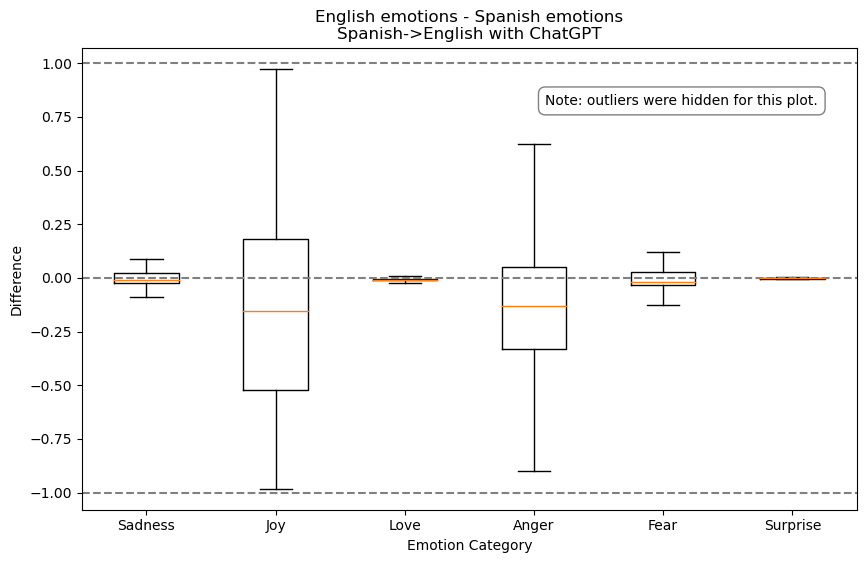

In [12]:
# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(difference, labels=['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'], showfliers=False)
plt.title('English emotions - Spanish emotions\nSpanish->English with ChatGPT')
plt.xlabel('Emotion Category')
plt.ylabel('Difference')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')

plt.text(0.95, 0.90, 'Note: outliers were hidden for this plot.', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))


plt.show()

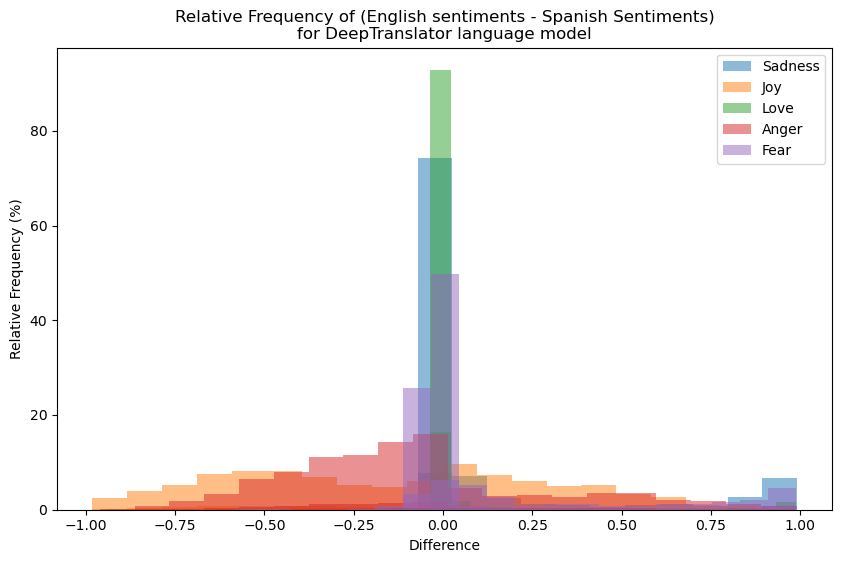

In [38]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms for each sentiment category
legend_handles = []  # To store legend handles
for i, sentiment in enumerate(['Joy', 'Love', 'Anger', 'Fear', 'Surprise']):
    counts, bins, _ = ax.hist(difference[:, i], bins=20, alpha=0.5, density=True, label=sentiment)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    percent = counts / counts.sum() * 100
    bars = ax.bar(bin_centers, percent, width=(bins[1] - bins[0]), alpha=0.5)
    legend_handles.append(bars[0])  # Store only the first bar for each sentiment category

# Add labels and title
ax.set_title('Relative Frequency of (English sentiments - Spanish Sentiments)\nfor DeepTranslator language model')
ax.set_xlabel('Difference')
ax.set_ylabel('Relative Frequency (%)')

# Add legend with single entry for each sentiment category
ax.legend(legend_handles, ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'])

# Display the plot
plt.show()

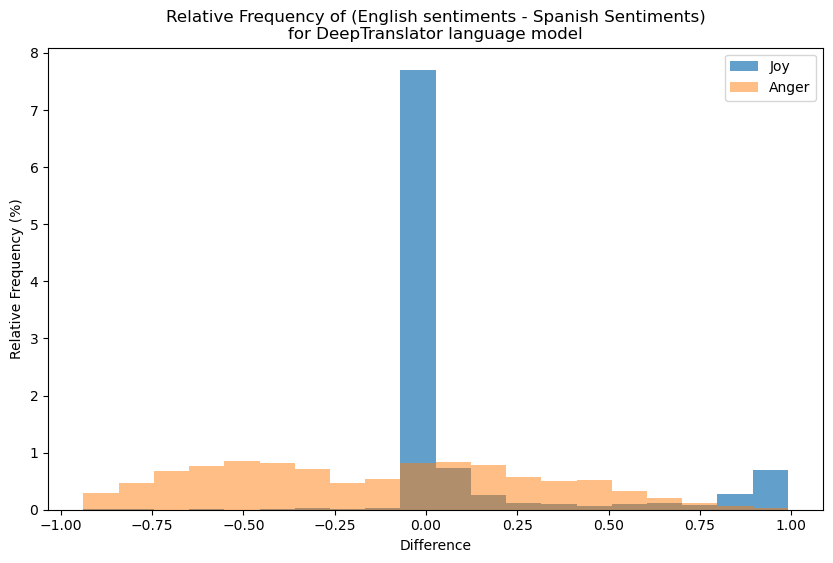

In [43]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Define custom colors for each sentiment category
colors = ['#1f77b4', '#ff7f0e']

# Plot histogram for 'Joy' sentiment category
counts_joy, bins_joy, _ = plt.hist(difference[:, 0], bins=20, density=True, alpha=0.7, color=colors[0], label='Joy')

# Plot histogram for 'Anger' sentiment category on the same axes
counts_anger, bins_anger, _ = plt.hist(difference[:, 1], bins=bins_joy, density=True, alpha=0.5, color=colors[1], label='Anger')

# Add labels and title
plt.title('Relative Frequency of (English sentiments - Spanish Sentiments)\nfor DeepTranslator language model')
plt.xlabel('Difference')
plt.ylabel('Relative Frequency (%)')

# Add legend
plt.legend()

# Display the plot
plt.show()


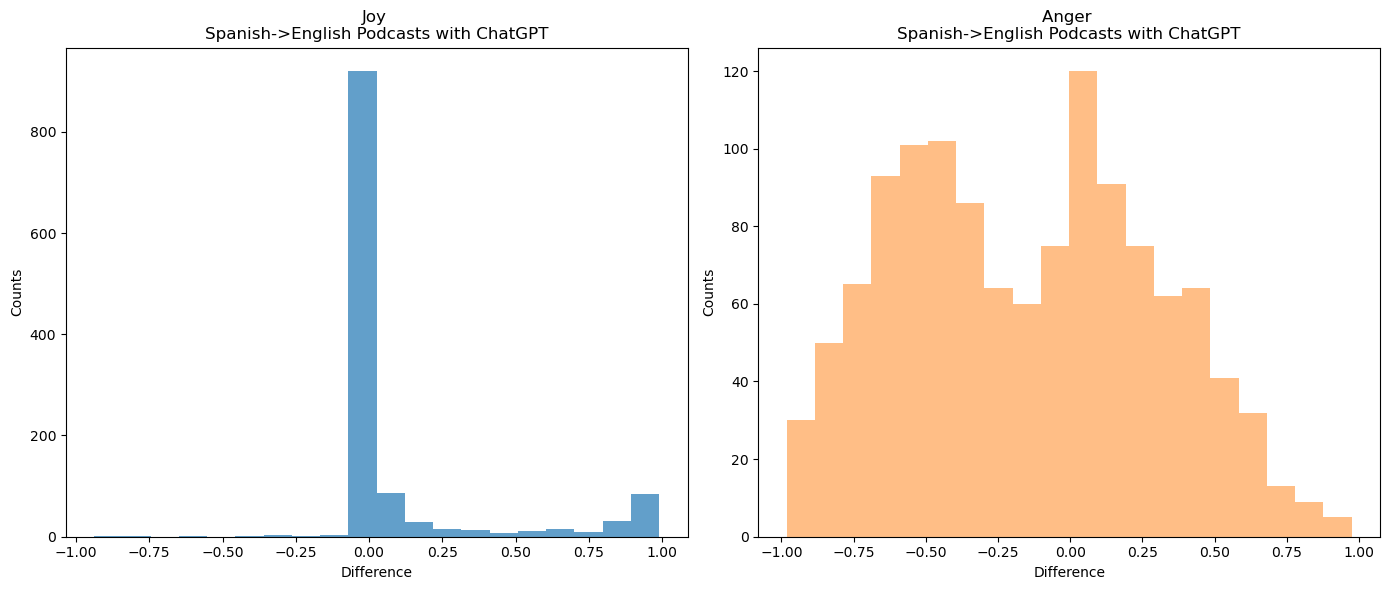

In [20]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Define custom colors for each sentiment category
colors = ['#1f77b4', '#ff7f0e']

# Plot histogram for 'Joy' sentiment category on the first subplot
axs[0].hist(difference[:, 0], bins=20, alpha=0.7, color=colors[0], label='Joy')

# Add labels and title to the first subplot
axs[0].set_title('Joy \nSpanish->English Podcasts with ChatGPT')
axs[0].set_xlabel('Difference')
axs[0].set_ylabel('Counts')
#axs[0].legend()

# Plot histogram for 'Anger' sentiment category on the second subplot
axs[1].hist(difference[:, 1], bins=20, alpha=0.5, color=colors[1], label='Anger')

# Add labels and title to the second subplot
axs[1].set_title('Anger \nSpanish->English Podcasts with ChatGPT')
axs[1].set_xlabel('Difference')
axs[1].set_ylabel('Counts')
#axs[1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


# What if we just look at the rows that have Joy diff > 0.75 (outliers) to see what the original text was like

In [31]:
diff_df = pd.DataFrame(difference).rename(columns={0:'Sadness', 1:'Joy', 2:'Love', 3:'Anger', 4:'Fear', 5:'Surprise'})

# Define the condition for masking
mask = diff_df['Joy'] > 0.75

# Apply the mask to filter rows in df_raw
masked_df_raw = df_raw[mask]

# Display the masked DataFrame
print(masked_df_raw.shape[0]," rows, or ",np.round(masked_df_raw.shape[0]/df_raw.shape[0]*100,2), "% of the original rows have a large discrepency in Joy values (greater than 75 percentage points higher in English)")

# Export masked_df_raw to a specific file path
masked_df_raw['Original'].to_csv('high_discrepency_Joy_ChatGPT_Spa_to_Eng.csv', index=False)

pd.set_option('display.max_colwidth', None)
pd.DataFrame(masked_df_raw[['Original','gpt4']])

18  rows, or  1.45 % of the original rows have a large discrepency in Joy values (greater than 75 percentage points higher in English)


,Original,gpt4
100,"¿Ah, no, no le va a tocar a Tijuana porque spoiler se viene una rola padrísima que estrenaremos especial para el Palenque del momento y 2 rolonones nuevos cuál posible? Órale vamos a trabajar, no, posiblemente. La cantemos en Tijuana, puede. Ser, pero si no, pues para la que.","Oh, no, it's not going to touch Tijuana because spoiler a great song is coming that we will premiere special for the Palenque of the moment and 2 great new songs which possible? Come on let's work, no, possibly. We sing it in Tijuana, can. Be, but if not, then for the one."
226,"¿Para qué no de verdad fo? Fo, entonces si tú tienes un salón, no te demores tanto, amigo, haz las cosas más rápido. No, pues que es posible. Es uno sí entiende los por qué, pero prefiero otro tipo de peluquerías. Bueno, yo después de que encontré ya la peluquería chévere.","Why not really, fo? Fo, so if you have a salon, don't take so long, buddy, make things faster. No, well it is possible. One does understand the reasons, but I prefer other types of hair salons. Well, after I found the cool hair salon."
302,"de la tarde, no me daba tiempo de regresar a arreglarme así, de regresar, de regresar a arreglarme.","afternoon, I didn’t have time to go back and get ready again, to go back, to go back and fix myself up."
322,"O sea, no. Alejandra, le voy a decir cabeza. Cabetzo. Ay cabeza cabeza, ay mi cabeza mis. Papás, eran súper cuidadosos con mi cabello, pero es un rayo mío. No sabes, están bien, tranquilos, no se preocupen. Entonces, si cambio de cabello y pelo constantemente, sorry no dejaban que utilizaran y planchan y secador no dejaba que me lo pintara o que me realizara algún tratamiento.","I mean, no. Alejandra, I’m going to say head. Head. Oh head head, oh my head my. Parents, were super careful with my hair, but it’s a thing of mine. You don’t know, they are fine, don’t worry. So, if I constantly change between 'cabello' and 'pelo', sorry they didn’t let me use and iron and hairdryer didn’t let me dye it or do any treatment."
469,":46 Cuente. Bueno, vean, pues yo. Como la grúa marco tendencias. Quiero escuchar eso. ¿Entonces, cómo les parece que?",":46 Tell. Well, look, so I. Like the crane, set trends. I want to hear that. So, what do you think?"
527,"Pero bien medio. A un capítulo más de yo soy un histórico y abuelo es un NG, yo soy vero y yo soy bárbara. Y ahora sí, ahora sí traemos un tema, un. Tema, un temazo muy polemicoso, muy de chismecito, muy de chismecito.","Okay then, onto another episode of 'I am a hysteric and grandpa is an old geezer, I am Vero and I am Barbara. And now, yes, now we bring a topic, a big, very gossip-worthy, very gossip-worthy topic."
596,"O sea, no, no está mal, no está mal. ¿O sea, tener una experiencia sexual linda? No, la cosa es que ambos lo disfruten y que no todo el tiempo estés regalando orgasmos porque va a llegar el punto en el que vas a seguir con tu pareja y ya no tienes orgasmos porque tú le enseñaste a que así te venías.","I mean, no, it's not bad, it's not bad. I mean, having a nice sexual experience? No, the thing is that both enjoy it and that you're not always giving away orgasms because there will come a time when you will continue with your partner and you no longer have orgasms because you taught them that's how you came."
874,"¿No sabes todo lo que te ahorrarías la cantidad de virus bacterias que podrías eliminar? Lo sé, Gustavo, lo sé, lo sé. ¿Serías tan saludable? ¿Soy consciente, o sea, me encantaría, digo, saben las veces? Imagínate, yo no vomito desde los 12 años. ¿Bueno, pero te ves? Recuerdo y experiencia de vomitar.","Do you know how much you would save, how many viruses and bacteria you could eliminate? I know, Gustavo, I know, I know. Would you be so healthy? I am aware, I mean, I would love to, you know how many times? Imagine, I haven’t vomited since I was 12 years old. Well, but do you see? Memory and experience of vomiting."
877,"Una cantidad de vómito aparte fue como Claro. Con ese vómi

In [25]:
string_lengths = df_raw['Original'].apply(len)

# Calculate the average and median lengths
average_length = string_lengths.mean()
median_length = string_lengths.median()

print("Average length:", average_length)
print("Median length:", median_length)

Average length: 288.3352180936995
Median length: 274.0


In [26]:
string_lengths = masked_df_raw['Original'].apply(len)

average_length = string_lengths.mean()
median_length = string_lengths.median()

print("Average length:", average_length)
print("Median length:", median_length)

Average length: 253.44444444444446
Median length: 258.5


# Trying to do more stats with I'm not stoked on the results
Probably just want to drop these cells, but I wasn't sure yet.

In [29]:
from scipy.stats import ttest_1samp

sentiments = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']
# Perform one-sample t-test for each category
alpha = 0.05  # significance level

for sentiment in sentiments:
    stat, p_value = ttest_1samp(diff_df[sentiment], 0)
    print(f"Sentiment: {sentiment}")
    print(f"Test statistic: {stat}")
    print(f"P-value: {p_value}")
    
    if p_value < alpha:
        print("Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.")
    else:
        print("Fail to reject the null hypothesis: There is no evidence that the true absolute difference is not equal to 0.")
    print()

Sentiment: Sadness
Test statistic: 12.771618363202652
P-value: 3.5353846333053e-35
Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.

Sentiment: Joy
Test statistic: -12.070245299897579
P-value: 8.581916234820625e-32
Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.

Sentiment: Love
Test statistic: 4.725770079270786
P-value: 2.55492332707578e-06
Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.

Sentiment: Anger
Test statistic: -8.65079663383981
P-value: 1.56329690791783e-17
Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.

Sentiment: Fear
Test statistic: 12.125442415305399
P-value: 4.7045059488438863e-32
Null hypothesis rejected: There is evidence that the true absolute difference is not equal to 0.

Sentiment: Surprise
Test statistic: 4.615350331187337
P-value: 4.332958522120388e-06
Null hypothesis 